# Predictive Maintenance 

### Student: Rodolfo Lerma

This assignment covers the topic of predictive maintenance. Predictive Maintenance problems adress predicting when a machine needs to be maintained ahead of breaking down. This problem can occur anywhere regular maintenance is required for a machine. For example, it can be used in manufacturing, fleet operations, train maintenance, etc.

This assignment will use the [Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset). The dataset consists of 10 000 data points stored as rows with 14 features in columns. The 'machine failure' label that indicates, whether the machine has failed in this particular datapoint.

# Learning Objectives
- Perform model tuning based on hyper parameters.
- Select the best model after attempting multiple models.
- Perform recursive feature elimination, producing a statistically significant improvement over a model without feature selection.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ai4i2020 = pd.read_csv('ai4i2020.csv')
print(ai4i2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
UDI                        10000 non-null int64
Product ID                 10000 non-null object
Type                       10000 non-null object
Air temperature [K]        10000 non-null object
Process temperature [K]    10000 non-null object
Rotational speed [rpm]     10000 non-null int64
Torque [Nm]                10000 non-null float64
Tool wear [min]            10000 non-null int64
Machine failure            10000 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB
None


In [2]:
ai4i2020.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0
9,10,M14869,M,298.5,309,1741,28.0,21,0


In [3]:
ai4i2020.shape

(10000, 9)

In [4]:
ai4i2020.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]         object
Process temperature [K]     object
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

## Question 1.1:  Write a command that will calculate the number of unique values for each feature in the training data.

In [5]:
columns_names = ai4i2020.columns.to_list()
updated_columns = columns_names.copy()
updated_columns.remove("UDI")
updated_columns.remove("Product ID")

for i in updated_columns:
    unique_values = ai4i2020[i].value_counts(dropna=False)
    print(' ')
    print('****************')
    print(' ')
    print(unique_values)

 
****************
 
L    6000
M    2997
H    1003
Name: Type, dtype: int64
 
****************
 
300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
300.6    216
298.2    208
302.3    203
297.5    198
300.4    198
300.8    196
300.3    188
298.1    188
298      184
300.2    182
299      177
298.3    175
302.2    166
300.9    166
300.1    164
298.4    159
301      155
297.3    155
302.4    151
299.1    150
301.5    150
297.6    148
298.6    147
297.9    146
299.2    145
        ... 
297       61
296.8     61
303       60
302.9     59
303.9     58
302.8     57
303.3     57
304.1     46
304       45
304.2     40
295.6     38
303.1     38
296.7     37
296.6     30
296.3     28
296.2     26
303.2     23
295.8     19
295.7     18
295.5     18
296.5     17
296.4     17
304.3     15
296.1     12
295.9     10
304.4      7
296        6
295.3      3
295.4      3
304.5      1
Name: Air temperature [K], Length: 93, dtype: int64
 
****************
 
310.6    317
310.8    273
310.7    26

In [6]:
print('Number of Unique Values per Column')
print(' ')
for i in columns_names:
    unique = ai4i2020[i].nunique()
    print(i)
    print(unique)
    print(' ')
    print('************')

Number of Unique Values per Column
 
UDI
10000
 
************
Product ID
10000
 
************
Type
3
 
************
Air temperature [K]
93
 
************
Process temperature [K]
82
 
************
Rotational speed [rpm]
941
 
************
Torque [Nm]
577
 
************
Tool wear [min]
246
 
************
Machine failure
2
 
************


## Question 1.2: Determine if the data contains any missing values, and replace the values with np.nan. Missing values would be '?'.

In [7]:
ai4i2020.replace('?', np.nan, inplace=True)

In [8]:
ai4i2020.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

UDI                          0
Product ID                   0
Type                         0
Air temperature [K]        140
Process temperature [K]    183
Rotational speed [rpm]       0
Torque [Nm]                  0
Tool wear [min]              0
Machine failure              0
dtype: int64

## Question 1.3: Replace all missing values with the mean. Change column types to numeric.

In [9]:
#replace missing values with their mode
import statistics as st
sample_columns = ['Air temperature [K]','Process temperature [K]']
for i in sample_columns:
    ai4i2020[i] = pd.to_numeric(ai4i2020[i])
    ai4i2020[i].fillna(np.mean(ai4i2020[i]), inplace=True)

## Question 1.4: Drop UDI and 'Product ID' from the data

In [10]:
ai4i2020.drop(columns=['UDI', 'Product ID'], inplace=True)
ai4i2020.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


## Data Exploration

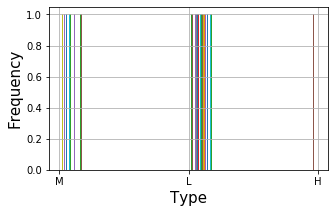

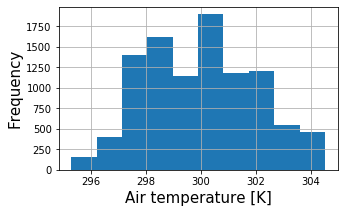

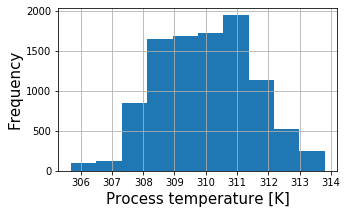

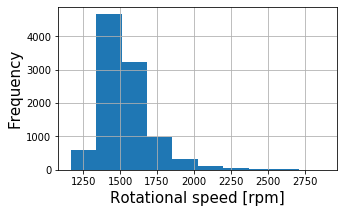

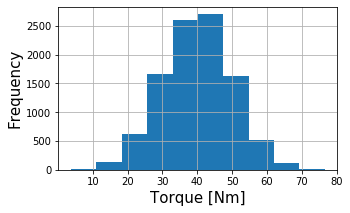

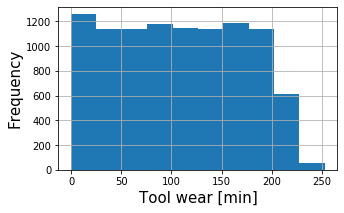

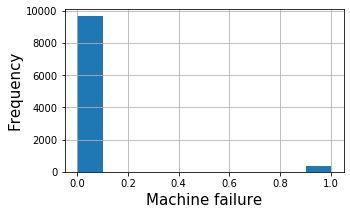

In [11]:
def hist_plot(df,a):
    df[a].hist(figsize = (5,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()

numeric = ai4i2020.columns.to_list()    
for i in numeric:
    hist_plot(ai4i2020, i)

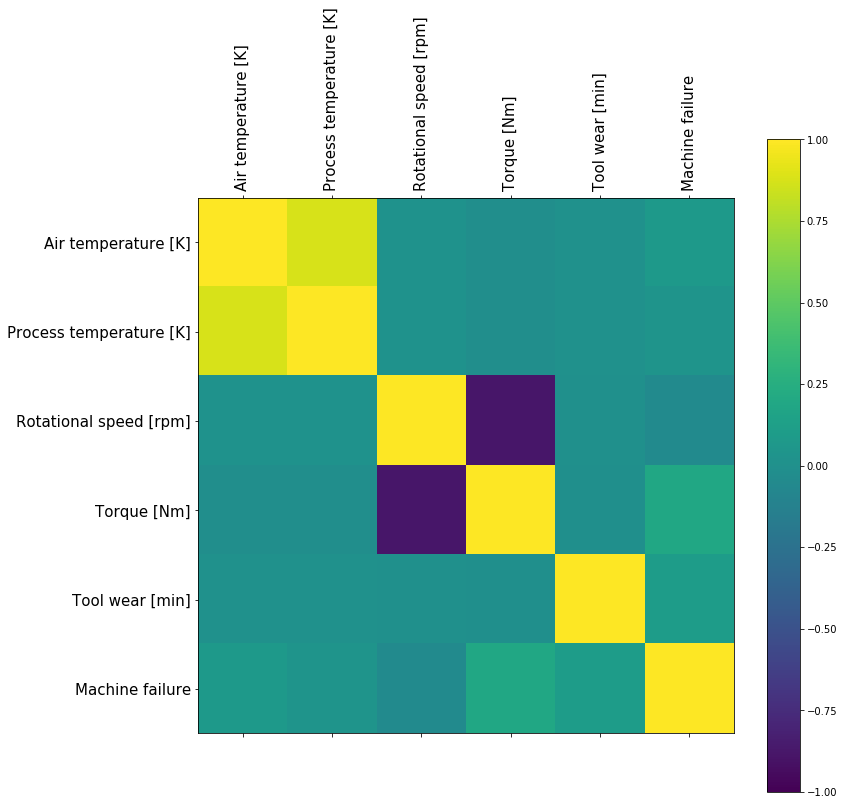

In [12]:
numeric.remove('Type')
correlations = ai4i2020.corr()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric, fontsize = 15, rotation=90)
ax.set_yticklabels(numeric, fontsize = 15)
plt.show()

## Question 2.2: Apply [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to data. Make sure to Fit the training data and transform both training and test data. 

In [13]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder(sparse=False)
x = ai4i2020['Type'].values.reshape(-1, 1)
ai4i2020_hot = hot_encoder.fit_transform(x)

#The names of the values/categories
column_names = hot_encoder.categories_

In [14]:
for i in range(3):
    ai4i2020[column_names[0][i]] = ai4i2020_hot[:,i].tolist()

In [15]:
ai4i2020.drop(columns=['Type'], inplace = True)

In [16]:
# Transformation perform to ensure the data format for the XGBClassifier
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
ai4i2020.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in ai4i2020.columns.values]

In [17]:
ai4i2020.head()

,Air temperature _K_,Process temperature _K_,Rotational speed _rpm_,Torque _Nm_,Tool wear _min_,Machine failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0,1.0,0.0


A transformation was performed on the columns' names to align with the requirements given by the XGBooster model.

## Question 2.1: Split the data into training and testing taking into consideration 'Machine failure' as the target (y)

### Splitting the data into the `training/validation` set and the `target` set.

In [18]:
columns_no_target = ai4i2020.columns.to_list()
columns_no_target.remove('Machine failure')

features = ai4i2020[columns_no_target]
target = ai4i2020['Machine failure']

#First split the Training/Validation and the Testing Set
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)

## Question 2.3: Apply [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to the training data since there is class imbalance.

In [19]:
y_train_val.value_counts()

0    7722
1     278
Name: Machine failure, dtype: int64

It is possible to see that there is a class imbalance.

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
variables_res, label_res = sm.fit_resample(X_train_val, y_train_val)
label_res.value_counts()

1    7722
0    7722
Name: Machine failure, dtype: int64

The class imbalance situation was corrected as seen on the counts for the target variable above.

### The `training/validation` set split into the `training` and `validation` set.

In [21]:
#Then split the Training/Validation into the Training and the Validation set
X_train, X_test, y_train, y_test = train_test_split(variables_res, label_res, test_size=0.2, random_state=42)

## Question 3.1: Train five machine learning [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) based on the training data, and evaluate their performance on the test dataset. Use default hyperparameter values.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

In [23]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print(" ")
    print("#############Classifier: " + header + " #############")
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        prediction = V[i].predict(X_test)
        
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()

## Question 3.1: Train five machine learning [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) based on the training data, and evaluate their performance on the test dataset. Use default hyperparameter values.

In [24]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors
lrc = LogisticRegression() #Logistic Regression
dtc = DecisionTreeClassifier() #DecisionTree
#xgb = XGBClassifier(use_label_encoder=False)
svc = SVC() #Support Vector Classification

#List for Classifiers and Names
header = ["KNN","Logistic_Regression","Decision_Tree","SVC"]
#header = ["KNN","Logistic_Regression","Decision_Tree","XGB_Classifier","SVC"]

#V = [knn,lrc,dtc,xgb,svc]
V = [knn,lrc,dtc,svc]

 
#############Classifier: KNN #############


Confusion matrix:
 [[1491   30]
 [ 189 1379]]

TP, TN, FP, FN: 1379 , 1491 , 30 , 189

Accuracy: 0.9291 ,Error Rate: 0.0709 ,Precision: 0.9787 ,Recall: 0.8795 ,F1 Score: 0.9264
 
#############Classifier: Logistic_Regression #############


Confusion matrix:
 [[1287  234]
 [ 278 1290]]

TP, TN, FP, FN: 1290 , 1287 , 234 , 278

Accuracy: 0.8343 ,Error Rate: 0.1657 ,Precision: 0.8465 ,Recall: 0.8227 ,F1 Score: 0.8344
 
#############Classifier: Decision_Tree #############


Confusion matrix:
 [[1480   41]
 [  53 1515]]

TP, TN, FP, FN: 1515 , 1480 , 41 , 53

Accuracy: 0.9696 ,Error Rate: 0.0304 ,Precision: 0.9737 ,Recall: 0.9662 ,F1 Score: 0.9699
 
#############Classifier: SVC #############


Confusion matrix:
 [[1318  203]
 [ 313 1255]]

TP, TN, FP, FN: 1255 , 1318 , 203 , 313

Accuracy: 0.833 ,Error Rate: 0.167 ,Precision: 0.8608 ,Recall: 0.8004 ,F1 Score: 0.8295


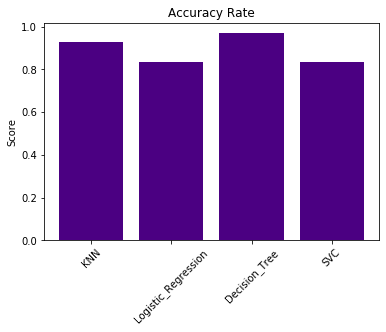

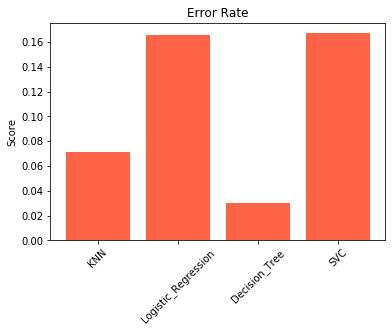

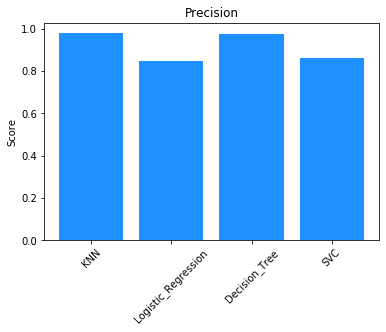

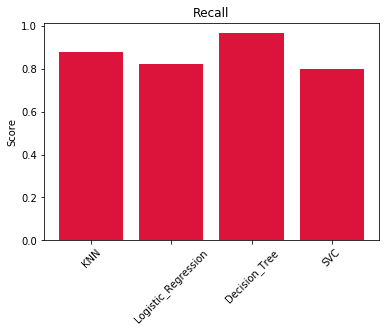

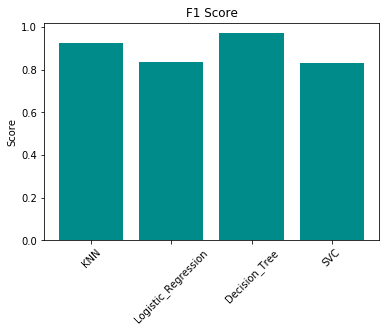

In [25]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train, X_test, y_train, y_test)

## Questions 3.2:  Perform recursive feature elimination (3 features) on the dataset using a logistic regression classifier with max_iter= 1000, random_state=5.  Any difference in the results? Explain.

In [26]:
from sklearn.feature_selection import RFE

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Accuracy: 0.5872450631272257
AUC: 0.671841665660347


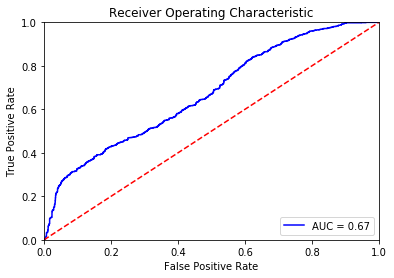

In [27]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Q.4. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

- What was your incoming experience with this model, if any? 
- What steps you took, what obstacles you encountered?
- How you link this exercise to real-world, machine learning problem-solving?
- What steps were missing? What else do you need to learn?

# Extra analysis (Feature Engineering)
## Feature Selection
### Filter Methods
#### Correlation

In [28]:
correlations_df = ai4i2020.corr()
df_correlations = correlations_df['Machine failure']
df_correlations = pd.DataFrame(data=df_correlations)
df_correlations['Corr_Abs'] = abs(df_correlations['Machine failure'])

min_corr = min(df_correlations['Corr_Abs'])
max_corr = max(df_correlations['Corr_Abs'][1:])

print('Max correlation value is = ' + str(round(max_corr, 4)))
print('Min correlation value is = ' + str(round(min_corr, 4)))

Max correlation value is = 1.0
Min correlation value is = 0.0224


In [29]:
#list: High correlation and low correlation
df_correlations.reset_index(inplace=True)
high_correlated_features = []
low_correlated_features = []
for i in range(len(df_correlations['Corr_Abs'])):
    p = df_correlations.iloc[i,2]
    if p >= 0.05:
        l = df_correlations.iloc[i,0]
        high_correlated_features.append(l)
    else:
        r = df_correlations.iloc[i,0]
        low_correlated_features.append(r)
        
high_correlated_features.remove('Machine failure')

#### Mutual Information

In [30]:
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mutual_values = []
for i in range(len(ai4i2020.iloc[1])):
    X = ai4i2020.iloc[:,i].tolist()
    Y = ai4i2020['Machine failure'].tolist()
    mi = calc_MI(X, Y, 20)
    mutual_values.append(mi)
    
my_list_mutual = ai4i2020.columns.values.tolist()    
mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
df_correlations['Mutual_info'] = mutual_values

min_mi = min(df_correlations['Mutual_info'])
max_mi = max(df_correlations['Mutual_info'][1:])

print('Max mi value is = ' + str(round(max_mi, 4)))
print('Min mi value is = ' + str(round(min_mi, 4)))

Max mi value is = 0.148
Min mi value is = 0.0003


In [31]:
#List: High mi and low mi
high_mi_features = []
low_mi_features = []
for i in range(len(df_correlations['Mutual_info'])):
    w = df_correlations.iloc[i,3]
    if w >= 0.01:
        q = df_correlations.iloc[i,0]
        high_mi_features.append(q)
    else:
        k = df_correlations.iloc[i,0]
        low_mi_features.append(k)
        
high_mi_features.remove('Machine failure')

len_mi = len(high_mi_features)
print('# of Features using MI: ' + str(len_mi))

# of Features using MI: 3


In [32]:
elements_in_both = sum(x in high_correlated_features for x in high_mi_features)
elements_in_both

2

### Wrapper Methods

#### Stepwise Model Selection

In [33]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 4, step=1)

df_copy = ai4i2020.copy()

target = ai4i2020['Machine failure']#This is the selection of the Target Variables
df_updated = df_copy.drop('Machine failure', axis='columns')

lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)
        
len_selected = len(selected_features)
print('# of Features using BACKWARD: ' + str(len_selected))

# of Features using BACKWARD: 4


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


### Embedded Methods

#### Lasso

In [34]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

clf.fit(lol, target)
lasso_coef = clf.coef_

#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)
        
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

# of Features using LASSO: 6


## Evaluation of the different models

In [35]:
from collections import Counter
from sklearn.datasets import make_classification

correlation_variables = ai4i2020[high_correlated_features]
mi_variables = ai4i2020[high_mi_features]
stepwise_variables = ai4i2020[selected_features]
lasso_variables = ai4i2020[lasso_features]

X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(mi_variables, target, test_size=0.30, random_state=42)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(stepwise_variables, target, test_size=0.30, random_state=42)
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(lasso_variables, target, test_size=0.30, random_state=42)

variables_mi_sm, label_mi_sm = sm.fit_resample(mi_variables, target)
variables_sp_sm, label_sp_sm = sm.fit_resample(stepwise_variables, target)
variables_la_sm, label_la_sm = sm.fit_resample(lasso_variables, target)

X_train_mi_sm, X_test_mi_sm, y_train_mi_sm, y_test_mi_sm = train_test_split(variables_mi_sm, label_mi_sm, test_size=0.30, random_state=42)
X_train_sp_sm, X_test_sp_sm, y_train_sp_sm, y_test_sp_sm = train_test_split(variables_sp_sm, label_sp_sm, test_size=0.30, random_state=42)
X_train_la_sm, X_test_la_sm, y_train_la_sm, y_test_la_sm = train_test_split(variables_la_sm, label_la_sm, test_size=0.30, random_state=42)

In [36]:
def perfomance_values_updated(T,Y,header):
    #print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    #print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    #print (" ")
    return AR, ER, P, R, F1

In [37]:
#Function to train the model and obtain the perfomance values from each model (in a plot form)
def performance_methods(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        #proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        #y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values_updated(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        #ROM_plots(T,y)
        allvalues = [AR, ER, P, R, F1]
    return allvalues

### Model Selection For Comparison

In [38]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

#### Model using Filter Method

In [39]:
filters = performance_methods(V, header, X_train_mi_sm, X_test_mi, y_train_mi_sm, y_test_mi)

#### Model using Wrapper Method

In [40]:
wrappers = performance_methods(V, header, X_train_sp_sm, X_test_sp, y_train_sp_sm, y_test_sp)

#### Model using Embedded Method

In [41]:
embedded = performance_methods(V, header, X_train_la_sm, X_test_la, y_train_la_sm, y_test_la)

### Comparison

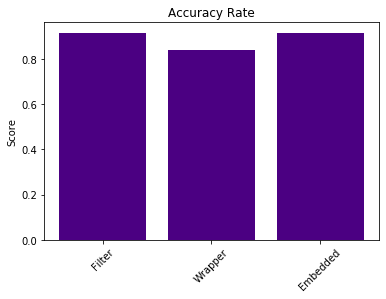

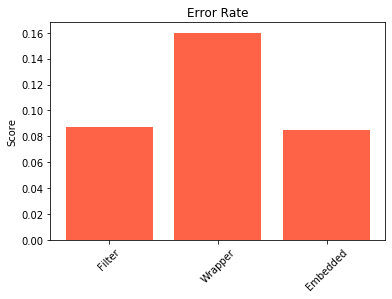

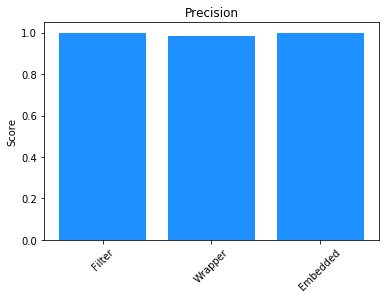

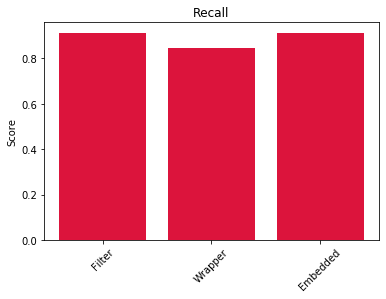

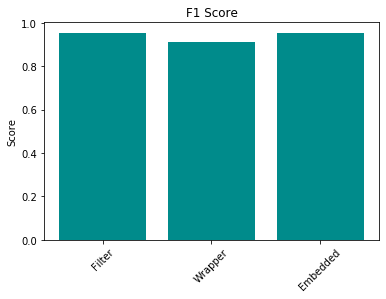

In [42]:
comparison_list = [filters,wrappers,embedded]
names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
header = ["Filter","Wrapper","Embedded"]    
#Plots of each of the Performance Values for each of the Classifiers in this analysis
for i in range(len(names)):
    x = [item[i] for item in comparison_list]
    plt.bar(header, x, color=colors[i])
    plt.xticks(rotation=45)
    plt.title(names[i])
    plt.ylabel("Score")
    plt.show()

## Comments

Look at the crispy-octo-waffle github